# new One - Dev started 15/02/2023


In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.metrics import rand_score,adjusted_rand_score
from sklearn.cluster import KMeans
import statistics as s
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import statistics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (MinMaxScaler,
FunctionTransformer,
LabelBinarizer,
LabelEncoder,
OneHotEncoder,
OrdinalEncoder,
StandardScaler,
)
from sklearn import preprocessing
import re
from kmodes.kmodes import KModes

import scienceplots

plt.style.use(['science','no-latex',"nature"])
#plt.style.use('science')



In [2]:
###variables
continuous_values = [
    "Age",
    "trestbps",
    "chol",
    "thalach",
    "oldpeak"
]
NA_REPLACE=["?"]

In [3]:
data=pd.read_table("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",sep=",",header=None)

cols=["Age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]

NR_COLS=len(cols)
data.columns=cols
data.head(4)


,Age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0


In [4]:
# categorical variables are aprehend by difference
categorical_values = data[data.columns.difference(continuous_values)].columns

In [5]:
for col in NA_REPLACE:
    data.replace(col,np.nan,inplace=True)

In [6]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
x_cont=imp_mean.fit_transform(data[continuous_values])
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
x_cat=imp_mean.fit_transform(data[categorical_values])
data[continuous_values]=pd.DataFrame(x_cont,columns=continuous_values)
data[categorical_values]=pd.DataFrame(x_cat,columns=categorical_values)

In [7]:
# convert types
data[continuous_values] = data[continuous_values].astype("float64")
data[categorical_values] = data[categorical_values].astype("float64").astype(str)


In [8]:
silo1=data.iloc[:100,:]
silo2=data.iloc[100:200,:]
silo3=data.iloc[200:300,:]

In [9]:
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
cc=kmode.fit_predict(data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 87, cost: 2091.0
Run 1, iteration: 2/100, moves: 21, cost: 2091.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 96, cost: 2089.0
Run 2, iteration: 2/100, moves: 11, cost: 2089.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 75, cost: 2113.0
Run 3, iteration: 2/100, moves: 1, cost: 2113.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 104, cost: 2080.0
Run 4, iteration: 2/100, moves: 17, cost: 2078.0
Run 4, iteration: 3/100, moves: 0, cost: 2078.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 95, cost: 2148.0
Run 5, iteration: 2/100, moves: 20, cost: 2145.0
Run 5, iteration: 3/100, moves: 2, cost: 2145.0
Best run was n

## Distributed clustering

1. cada um inicializa  
1.1 ou com elementos tirados de uma distribuição com media igual a sua e desvio padrao x  
1.2 ou com proprios centroides  
1.3 ou com ruido nos dados e depois criar centroides  
2. cada um recebe os centroids e adiciona os seus proprios e a sua media (a media insere vies)  
3. repetir envio até:  
    3.1 medida de concordancia que é matrix confusão de todos os pares de pontos e cujo centroide estao associados   
    

In [10]:
kmode.cluster_centroids_

array([['57.0', '1.0', '4.0', '140.0', '254.0', '0.0', '0.0', '132.0',
        '1.0', '1.2', '2.0', '1.0', '7.0', '2.0'],
       ['58.0', '1.0', '4.0', '120.0', '197.0', '0.0', '2.0', '162.0',
        '0.0', '0.0', '2.0', '0.0', '3.0', '0.0'],
       ['54.0', '1.0', '3.0', '130.0', '204.0', '0.0', '0.0', '163.0',
        '0.0', '0.0', '1.0', '0.0', '3.0', '0.0']], dtype='<U32')

In [11]:
# 1. cada um inicializa com os seus dados
def create_initializer_cat_kmodes(data,cols,clusters):
    """
    initializer is creating a dummy centroid for initializing
    takes the data, uses it to create random noise and then adds it to the real clusters
    "real [['1.0' '4.0']
 ['1.0' '3.0']]"
    """
    res=np.zeros((clusters,len(cols)))
    for idx,c in enumerate(cols):
        random_choice=data[c].sample(2)
        res[:,idx]=random_choice.values[0]
        #res.append(random_choice.values)
    return res


init_1=create_initializer_cat_kmodes(silo1,["sex"],2) #1.1
init_2=create_initializer_cat_kmodes(silo2,["sex"],2)
init_3=create_initializer_cat_kmodes(silo3,["sex"],2)
print("init_1",init_1)
print("init_2",init_2)
print("init_3",init_3)

init_1 [[0.]
 [0.]]
init_2 [[1.]
 [1.]]
init_3 [[1.]
 [1.]]


In [12]:
init_l_1=create_initializer_cat_kmodes(silo1,["sex","cp"],2) #1.1
init_l_2=create_initializer_cat_kmodes(silo2,["sex","cp"],2) #1.1
init_l_3=create_initializer_cat_kmodes(silo3,["sex","cp"],2) #1.1
print("init_1",init_l_1)
print("init_2",init_l_2)
print("init_3",init_l_3)

init_1 [[1. 2.]
 [1. 2.]]
init_2 [[1. 4.]
 [1. 4.]]
init_3 [[0. 4.]
 [0. 4.]]


In [74]:
#2. cada um recebe os centroids e adiciona os seus proprios e a sua media (a media insere vies)  
def calculate_centroids_cat_kmodes(seeds,data,cols,clusters):
   #print(seeds)
   #print(seeds[0])
  # results=[]
   #print(cols)
   print(np.array(seeds))
   #for idx,c in enumerate(cols):
   #   print(idx)
      #my_porp=data[c].value_counts(normalize=True).value   
   #   print(seeds)
   #other_seeds=np.array([item[:,idx] for item in seeds])
   #  other_seeds=[item[idx] for item in seeds]
   #  print(other_seeds)
#   real_centroids=KMeans(n_clusters=clusters,n_init=10, random_state=0).fit(data[c].values.reshape(-1, 1))
   real_centroids = KModes(n_clusters=clusters, init = "random", n_init = 5, verbose=0).fit(data[cols])
      

      #other_seed_flat=[item for sublist in other_seeds for item in sublist]
     # print(np.array(other_seeds).flatten())
     # print("real",real_centroids.cluster_centroids_)
   
   #final_list_data=np.append(np.array(seeds),real_centroids.cluster_centroids_) #add real centroids
   seeds_=np.concatenate(seeds)
  # print(seeds_)
  # print(real_centroids.cluster_centroids_)
   final_list_data=np.concatenate((seeds_,real_centroids.cluster_centroids_)) #add real centroids
   print(final_list_data)
   res=KModes(n_clusters=clusters, init = "random", n_init = 5, verbose=0)
   res.fit(final_list_data)

   #print(res.cluster_centroids_)
   return res.cluster_centroids_



c1=calculate_centroids_cat_kmodes([init_l_2,init_l_3],silo1,["sex","cp"],2)
c2=calculate_centroids_cat_kmodes([init_l_1,init_l_3],silo2,["sex","cp"],2)
c3=calculate_centroids_cat_kmodes([init_l_1,init_l_2],silo3,["sex","cp"],2)
print("c1",c1)
print("c2",c2)
print("c3",c3)


[[[1. 4.]
  [1. 4.]]

 [[0. 4.]
  [0. 4.]]]
[['1.0' '4.0']
 ['1.0' '4.0']
 ['0.0' '4.0']
 ['0.0' '4.0']
 ['1.0' '4.0']
 ['1.0' '3.0']]
[[[1. 2.]
  [1. 2.]]

 [[0. 4.]
  [0. 4.]]]
[['1.0' '2.0']
 ['1.0' '2.0']
 ['0.0' '4.0']
 ['0.0' '4.0']
 ['1.0' '4.0']
 ['0.0' '4.0']]
[[[1. 2.]
  [1. 2.]]

 [[1. 4.]
  [1. 4.]]]
[['1.0' '2.0']
 ['1.0' '2.0']
 ['1.0' '4.0']
 ['1.0' '4.0']
 ['1.0' '4.0']
 ['0.0' '4.0']]
c1 [['0.0' '4.0']
 ['1.0' '4.0']]
c2 [['0.0' '4.0']
 ['1.0' '2.0']]
c3 [['1.0' '2.0']
 ['1.0' '4.0']]


In [43]:
init_l__1=create_initializer_cat_kmodes(silo1,["sex","cp","restecg"],2) #1.1
init_l__2=create_initializer_cat_kmodes(silo2,["sex","cp","restecg"],2) #1.1
init_l__3=create_initializer_cat_kmodes(silo3,["sex","cp","restecg"],2) #1.1
print("init_1",init_l__1)
print("init_2",init_l__2)
print("init_3",init_l__3)

init_1 [[1. 3. 0.]
 [1. 3. 0.]]
init_2 [[1. 4. 2.]
 [1. 4. 2.]]
init_3 [[1. 4. 0.]
 [1. 4. 0.]]


In [75]:
c1=calculate_centroids_cat_kmodes([init_l__2,init_l__3],silo1,["sex","cp","restecg"],2)
c2=calculate_centroids_cat_kmodes([init_l__1,init_l__3],silo2,["sex","cp","restecg"],2)
c3=calculate_centroids_cat_kmodes([init_l__1,init_l__2],silo3,["sex","cp","restecg"],2)
print("c1",c1)
print("c2",c2)
print("c3",c3)

[[[1. 4. 2.]
  [1. 4. 2.]]

 [[1. 4. 0.]
  [1. 4. 0.]]]
[['1.0' '4.0' '2.0']
 ['1.0' '4.0' '2.0']
 ['1.0' '4.0' '0.0']
 ['1.0' '4.0' '0.0']
 ['1.0' '4.0' '2.0']
 ['1.0' '3.0' '0.0']]
[[[1. 3. 0.]
  [1. 3. 0.]]

 [[1. 4. 0.]
  [1. 4. 0.]]]
[['1.0' '3.0' '0.0']
 ['1.0' '3.0' '0.0']
 ['1.0' '4.0' '0.0']
 ['1.0' '4.0' '0.0']
 ['1.0' '4.0' '2.0']
 ['1.0' '3.0' '0.0']]
[[[1. 3. 0.]
  [1. 3. 0.]]

 [[1. 4. 2.]
  [1. 4. 2.]]]
[['1.0' '3.0' '0.0']
 ['1.0' '3.0' '0.0']
 ['1.0' '4.0' '2.0']
 ['1.0' '4.0' '2.0']
 ['1.0' '4.0' '0.0']
 ['0.0' '4.0' '0.0']]
c1 [['1.0' '4.0' '0.0']
 ['1.0' '4.0' '2.0']]
c2 [['1.0' '3.0' '0.0']
 ['1.0' '4.0' '0.0']]
c3 [['1.0' '4.0' '0.0']
 ['1.0' '3.0' '0.0']]


In [77]:
#3. 
def calculate_centroids_and_score_cat_kmodes(clusters,other_centroids,mydata,cols,old_preds=None):

 # newcs=np.zeros((clusters,len(cols)))
  #print(newcs)
 #preds=[]
 # scores=[]
  scores=0
  c1=calculate_centroids_cat_kmodes(other_centroids,mydata,cols,clusters)
  print("c1",c1)
#  print("other",other_centroids)
 # for idx,c in enumerate(c1):
  #  print(c)
   # print(idx)
  kmm1_=KModes(n_clusters=clusters, init = "random", n_init = 5, verbose=0).fit(c1)
   # kmm1_=KMeans(n_clusters=clusters,n_init=10, random_state=0).fit(c.reshape(-1, 1))
  ll=mydata[cols]
  print(ll)
  print(kmm1_.cluster_centroids_)
  pred=kmm1_.predict(ll)
   # print(pred)
  new_c=kmm1_.cluster_centroids_
   # newcs[:,idx]=new_c
  if old_preds is not None: #first round
    #  print(old_preds)
    scores=rand_score(pred,old_preds)

  return new_c,pred,scores

xx,_,_=calculate_centroids_and_score_cat_kmodes(2,[init_l_2,init_l_3],silo1,["sex","cp"])
xx

[[[1. 4.]
  [1. 4.]]

 [[0. 4.]
  [0. 4.]]]
[['1.0' '4.0']
 ['1.0' '4.0']
 ['0.0' '4.0']
 ['0.0' '4.0']
 ['1.0' '4.0']
 ['1.0' '3.0']]
c1 [['0.0' '4.0']
 ['1.0' '4.0']]
    sex   cp
0   1.0  1.0
1   1.0  4.0
2   1.0  4.0
3   1.0  3.0
4   0.0  2.0
..  ...  ...
95  1.0  4.0
96  1.0  4.0
97  0.0  4.0
98  1.0  2.0
99  1.0  4.0

[100 rows x 2 columns]
[['1.0' '4.0']
 ['0.0' '4.0']]


array([['1.0', '4.0'],
       ['0.0', '4.0']], dtype='<U3')

In [78]:
xx,_,_=calculate_centroids_and_score_cat_kmodes(2,[init_l__2,init_l__3],silo1,["sex","cp","restecg"])
xx

[[[1. 4. 2.]
  [1. 4. 2.]]

 [[1. 4. 0.]
  [1. 4. 0.]]]
[['1.0' '4.0' '2.0']
 ['1.0' '4.0' '2.0']
 ['1.0' '4.0' '0.0']
 ['1.0' '4.0' '0.0']
 ['1.0' '3.0' '0.0']
 ['1.0' '4.0' '2.0']]
c1 [['1.0' '4.0' '0.0']
 ['1.0' '4.0' '2.0']]
    sex   cp restecg
0   1.0  1.0     2.0
1   1.0  4.0     2.0
2   1.0  4.0     2.0
3   1.0  3.0     0.0
4   0.0  2.0     2.0
..  ...  ...     ...
95  1.0  4.0     0.0
96  1.0  4.0     2.0
97  0.0  4.0     2.0
98  1.0  2.0     0.0
99  1.0  4.0     2.0

[100 rows x 3 columns]
[['1.0' '4.0' '0.0']
 ['1.0' '4.0' '2.0']]


array([['1.0', '4.0', '0.0'],
       ['1.0', '4.0', '2.0']], dtype='<U3')

In [81]:
#3. repetir envio até:  
#    3.1 medida de concordancia que é matrix confusão de todos os pares de pontos e cujo centroide estao associados   

def mock_data_transfer_and_convergence_cat_kmodes(limit_after_convergence,threshold,cols_used,clusters=2):
    c1=create_initializer_cat_kmodes(silo1,cols_used,clusters) 
    c2=create_initializer_cat_kmodes(silo2,cols_used,clusters)
    c3=create_initializer_cat_kmodes(silo3,cols_used,clusters)
   # print("inits; ",c1,c2,c3)
   # if len(c1)!=len(cols_used):
   #     raise Exception("wrong number of centroids")
    old_preds_1=old_preds_2=old_preds_3=None
    last_significance_round=0

    while  last_significance_round<limit_after_convergence:
        nc1,old_preds_1,score_1=calculate_centroids_and_score_cat_kmodes(clusters=clusters,other_centroids=[c2,c3],mydata=silo1,cols=cols_used,old_preds=old_preds_1)
        nc2,old_preds_2,score_2=calculate_centroids_and_score_cat_kmodes(clusters=clusters,other_centroids=[c1,c3],mydata=silo2,cols=cols_used,old_preds=old_preds_2)
        nc3,old_preds_3,score_3=calculate_centroids_and_score_cat_kmodes(clusters=clusters,other_centroids=[c1,c2],mydata=silo3,cols=cols_used,old_preds=old_preds_3)
        print("c1",c1)
        print("nc1",nc1)
        if len(nc1)!=len(c1):
            raise Exception("wrong number of centroids")

        c1=nc1
        c2=nc2
        c3=nc3
        print(score_1,score_2,score_3,"****"*50)
        print(last_significance_round,"+++"*50)
        if all([k>threshold for k in [score_1,score_2,score_3]]):
            last_significance_round+=1
        else:
            last_significance_round=0
    return nc1,nc2,nc3

In [82]:
f1,f2,f3=mock_data_transfer_and_convergence_cat_kmodes(20,0.9,["sex","cp","restecg"])
#0.3 - 2s
#0.5 - 5s
#0.6 -13.5s
#0.7

[[[0. 3. 0.]
  [0. 3. 0.]]

 [[1. 4. 0.]
  [1. 4. 0.]]]
[['0.0' '3.0' '0.0']
 ['0.0' '3.0' '0.0']
 ['1.0' '4.0' '0.0']
 ['1.0' '4.0' '0.0']
 ['1.0' '4.0' '2.0']
 ['0.0' '3.0' '0.0']]
c1 [['1.0' '4.0' '0.0']
 ['0.0' '3.0' '0.0']]
    sex   cp restecg
0   1.0  1.0     2.0
1   1.0  4.0     2.0
2   1.0  4.0     2.0
3   1.0  3.0     0.0
4   0.0  2.0     2.0
..  ...  ...     ...
95  1.0  4.0     0.0
96  1.0  4.0     2.0
97  0.0  4.0     2.0
98  1.0  2.0     0.0
99  1.0  4.0     2.0

[100 rows x 3 columns]
[['0.0' '3.0' '0.0']
 ['1.0' '4.0' '0.0']]
[[[1. 3. 2.]
  [1. 3. 2.]]

 [[1. 4. 0.]
  [1. 4. 0.]]]
[['1.0' '3.0' '2.0']
 ['1.0' '3.0' '2.0']
 ['1.0' '4.0' '0.0']
 ['1.0' '4.0' '0.0']
 ['1.0' '3.0' '0.0']
 ['1.0' '4.0' '2.0']]
c1 [['1.0' '4.0' '0.0']
 ['1.0' '3.0' '2.0']]
     sex   cp restecg
100  1.0  4.0     2.0
101  1.0  1.0     2.0
102  0.0  4.0     2.0
103  0.0  3.0     2.0
104  1.0  3.0     0.0
..   ...  ...     ...
195  1.0  4.0     2.0
196  1.0  1.0     2.0
197  0.0  4.0     2.0
198

In [83]:
f1

array([['0.0', '3.0', '0.0'],
       ['1.0', '4.0', '2.0']], dtype='<U3')

In [84]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5,5)

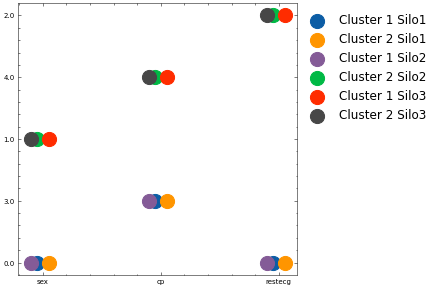

In [85]:
# plot
xlabel=["sex","cp","restecg"]
# plot
x=[1,2,3]
#c1=plt.scatter(x,kmm3_.cluster_centers_)
c2=plt.scatter([x-0.05 for x in x],f1[0],s=200)
c21=plt.scatter([x-0.05 for x in x],f1[1],s=200)

c3=plt.scatter([x+0.05 for x in x],f2[0],s=200)
c31=plt.scatter([x+0.05 for x in x],f2[1],s=200)

c4=plt.scatter([x-0.10 for x in x],f3[0],s=200)
c41=plt.scatter([x-0.10 for x in x],f3[1],s=200)

#c5=plt.scatter([1.10,2.10,3.10],silo2[["Age","trestbps","chol"]].mean().values)


lgd=plt.legend(( c2,c3,c4,c21,c31,c41),
           ( 'Cluster 1 Silo1','Cluster 2 Silo1','Cluster 1 Silo2','Cluster 2 Silo2','Cluster 1 Silo3','Cluster 2 Silo3'),
           scatterpoints=1,
          # loc="lower right",
           fontsize=12,bbox_to_anchor=(0.99, 1))
plt.xticks(x, xlabel)

plt.savefig("Vizs/my_cluster_3_cat_kmodes.png",bbox_extra_artists=(lgd,), bbox_inches='tight')
#jitter - ver chatgpt

In [90]:
f1.flatten()

array(['0.0', '3.0', '0.0', '1.0', '4.0', '2.0'], dtype='<U3')

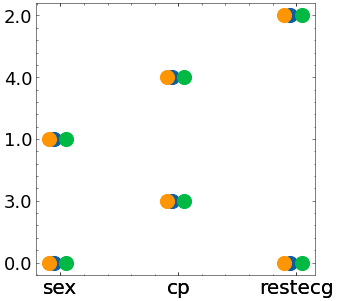

In [91]:
# plot
xlabel=["sex","cp","restecg","sex","cp","restecg"]
# plot
x=[1,2,3,1,2,3]
#c1=plt.scatter(x,kmm3_.cluster_centers_)
c2=plt.scatter([x-0.05 for x in x],f1.flatten(),s=200)
c3=plt.scatter([x+0.05 for x in x],f2.flatten(),s=200)
c4=plt.scatter([x-0.10 for x in x],f3.flatten(),s=200)
#c5=plt.scatter([1.10,2.10,3.10],silo2[["Age","trestbps","chol"]].mean().values)


#lgd=plt.legend(( c2,c3,c4),
#           ( 'Convergence S1',"Convergence S2","convergence S3"),
#           scatterpoints=1,
#         #  loc=5,
#           fontsize=12,bbox_to_anchor=(1.01, 1.))
plt.xticks(x, xlabel)
plt.xticks(fontsize=20)
plt.yticks(fontsize=18)

plt.savefig("Vizs/my_cluster_3_cat_kmodes.png", bbox_inches='tight')
#jitter - ver chatgpt